1.We have data from the questionnaires survey (to ask people opinion) and objective testing with two attributes (acid durability and strength) to classify whether a special paper tissue is good or not. Here is four training samples as follows. Apply the K-nearest neighbour’s (KNN) algorithm when K=2, 3 and 4 to classify an instance (3, 7) as good or bad. 

Implement the above using python without using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also draw the decision boundary. Calculate the distance using Euclidean, Manhattan, and Minkowski and compare.

k:2 is classified as bad
k:3 is classified as bad
k:4 is classified as bad


,X1,X2,Y,Euclidean_Distance,Rank
0,7,7,Bad,4.000000,6.0
1,7,4,Bad,5.000000,8.0
2,3,4,Good,3.000000,4.0
3,1,4,Good,3.605551,5.0
4,4,5,Bad,2.236068,3.0
5,3,5,Good,2.000000,2.0
6,4,6,Bad,1.414214,1.0
7,8,7,Bad,5.000000,8.0
8,7,9,Good,4.472136,7.0
9,8,8,Bad,5.099020,10.0


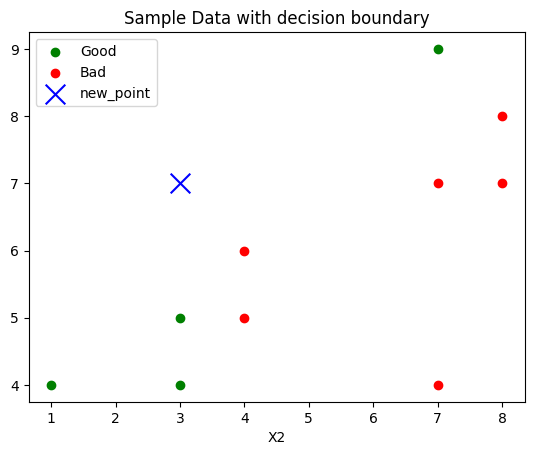

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
x = df[['X1','X2']].values
y = df['Y'].values
new_point = [3,7]

def compute_euclidean(df,new_point):
    df['Euclidean_Distance'] = np.sqrt((new_point[0] - df['X1'])**2 + (new_point[1] - df['X2'])**2)

compute_euclidean(df,new_point)

def compute_rank(df):
    df['Rank'] = df['Euclidean_Distance'].rank(ascending=True,method='min')

compute_rank(df)

def KNN(df, k):
    nearest_neighbours = df.sort_values(by='Rank')[:k]
    good_count = (nearest_neighbours['Y'] == 'Good').sum()
    bad_count = (nearest_neighbours['Y'] == 'Bad').sum()
    if good_count > bad_count:
        print(f"k:{k} is classified as good")
    else:
        print(f"k:{k} is classified as bad")

k = 2
KNN(df,k)
k = 3
KNN(df,k)
k = 4
KNN(df,k)

good_samples,bad_samples = df[df['Y'] == 'Good'],df[df['Y'] == 'Bad']
plt.scatter(good_samples['X1'],good_samples['X2'],color='green',label='Good')
plt.scatter(bad_samples['X1'],bad_samples['X2'],color='red',label='Bad')
plt.scatter(new_point[0],new_point[1],marker='x',s=200,color='blue',label='new_point')
plt.xlabel('X1')
plt.xlabel('X2')
plt.legend()
plt.title('Sample Data with decision boundary')
df

In [33]:
df  = pd.read_csv('data.csv')
new_point = [3,7]

def compute_euclidean(df,new_point):
    df['Euclidean_Distance'] = np.sqrt((new_point[0] - df['X1'])**2 + (new_point[1] - df['X2'])**2)

def compute_manhattan(df,new_point):
    df['Manhattan_Distance'] = np.abs(new_point[0] - df['X1']) + np.abs(new_point[1] - df['X2'])

def compute_minkowski(df,new_point,p):
    df['Minkowski_Distance'] = np.power(np.power(np.abs(new_point[0] - df['X1']), p) + np.power(np.abs(new_point[1] - df['X2']), p), 1/p)

p=2
compute_euclidean(df,new_point)
compute_manhattan(df,new_point)
compute_minkowski(df,new_point,p)

def compute_rank(df):
    df['Euclidean_Rank'] = df['Euclidean_Distance'].rank(ascending=True,method='min')
    df['Manhattan_Rank'] = df['Manhattan_Distance'].rank(ascending=True,method='min')
    df['Minkowski_Rank'] = df['Minkowski_Distance'].rank(ascending=True,method='min')

compute_rank(df)

def KNN(df,k,dist_metric):
    if dist_metric == 'Euclidean':
        nearest_neighbours_df = df.sort_values(by='Euclidean_Distance')[:k]
    elif dist_metric == 'Minkowski':
        nearest_neighbours_df = df.sort_values(by='Minkowski_Distance')[:k]
    elif dist_metric == 'Manhattan':
        nearest_neighbours_df = df.sort_values(by='Manhattan_Distance')[:k]

    good_count = (nearest_neighbours_df['Y'] == 'Good').sum()
    bad_count  = (nearest_neighbours_df['Y'] == 'Bad').sum()
    if good_count > bad_count:
        print(f"{dist_metric}\nk:{k} is classified as good")
    else:
        print(f"{dist_metric}\nk:{k} is classified as bad")

k_val = [2,3,4]
dist_metric = ['Euclidean','Manhattan','Minkowski']
for k in k_val:
    for d in dist_metric:
        KNN(df,k,d)


Euclidean
k:2 is classified as bad
Manhattan
k:2 is classified as bad
Minkowski
k:2 is classified as bad
Euclidean
k:3 is classified as bad
Manhattan
k:3 is classified as good
Minkowski
k:3 is classified as bad
Euclidean
k:4 is classified as bad
Manhattan
k:4 is classified as bad
Minkowski
k:4 is classified as bad


2. Implement the Question number 1 with using scikit learn library. Plot the given samples Bad in Red color and Good in green color. Also plot the decision boundary. Calculate the distance using Euclidean, Manhattan, and Minkowski and compare

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
df = pd.read_csv('data.csv')
x = df[['X1','X2']].values
y = df['Y'].replace({'Good':1,'Bad':0}).values

clf = KNeighborsClassifier(n_neighbors=3,p=3,metric='euclidean')
clf.fit(x,y)
y_pred = clf.predict([[3,7]])
print(f'for (3,7) it is classified as {y_pred} using euclidean')
clf = KNeighborsClassifier(n_neighbors=3,p=3,metric='manhattan')
clf.fit(x,y)
y_pred = clf.predict([[3,7]])
print(f'for (3,7) it is classified as {y_pred} using manhattan')
clf = KNeighborsClassifier(n_neighbors=3,p=3,metric='minkowski')
clf.fit(x,y)
y_pred = clf.predict([[3,7]])
print(f'for (3,7) it is classified as {y_pred} using minkowski')

for (3,7) it is classified as [0] using euclidean
for (3,7) it is classified as [1] using manhattan
for (3,7) it is classified as [0] using minkowski
